# First steps in working with AHN3 point cloud data

Select appropriate tile from https://downloads.pdok.nl/ahn3-downloadpage/, download this tile:
```
wget https://download.pdok.nl/rws/ahn3/v1_0/laz/C_17CN1.LAZ
```

Extract the area around the telescope with, following [this tutorial](https://bertt.wordpress.com/2018/11/08/dutch-ahn3-point-cloud-visualization/) (extracting takes half an hour or so).

```
docker run -v $PWD:/data pdal/pdal pdal pipeline /data/crop.json
```

In [46]:
!cat cropdt.json

{"pipeline":["/data/C_17CN1.LAZ", {"type":"filters.crop", "bounds": "([222986,223081],[536532, 536602])"}, "/data/dt.laz"]}


In [47]:
!du -hs C_17CN1.LAZ

2.3G	C_17CN1.LAZ


In [48]:
!du -hs dt.laz

388K	dt.laz


Now open the laz file in CloudCompare, and delete extra points following [this tutorial](https://www.youtube.com/watch?v=m1rrGbf3Xs4). Save as text file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation, writers
from tqdm.autonotebook import tqdm

/anaconda/envs/school19/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
xyz = np.loadtxt("/Users/dijkema/camras/ahn3-puntenwolk/dt-cloud.txt", skiprows=1)[:, :3]

In [4]:
fig = plt.figure(figsize=(10, 10));
#fig.subplots_adjust(left=0.45, right=0.55, top=0.55, bottom=0.45)

def make_figure(alt: int = 20, az: int = 30):
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(alt, az)
    ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], s=0.15, color='k')
    ax.set_aspect(1)
    ax.set_axis_off()
    return fig

<Figure size 720x720 with 0 Axes>

In [5]:
interact(make_figure, alt=(0, 90, 5), az=(0, 355, 5));

interactive(children=(IntSlider(value=20, description='alt', max=90, step=5), IntSlider(value=30, description=…

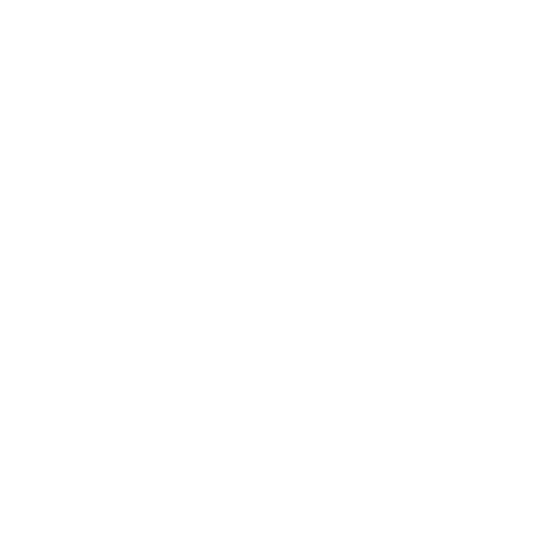

In [40]:
fig = plt.figure(figsize=(10, 10));
ax = fig.add_subplot(111, projection='3d');

ax.view_init(20, 0);
ax.set_aspect(1);
ax.set_axis_off();
    
def init():
    ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], s=0.1, color='k')
    return fig,

In [41]:
t = tqdm(total=178)

def animate(i):
    ax.view_init(20., i*2)
    t.update()
    return fig,

In [42]:
# Animate
anim = FuncAnimation(fig, animate, init_func=init, frames=178, interval=20, blit=True)
# Save
writer = writers['ffmpeg'](fps=30, bitrate=1000, extra_args=['-vcodec', 'h264', "-filter:v", "crop=1280:720:80:360"])
anim.save('dt-rotating.mp4', writer=writer, dpi=2*fig.dpi)
t.close()